# <div style = "text-align:center"> **Dynamic Risk Budgeting** </div>

In [1]:
import numpy as np
import pandas as pd
import edhec_risk_ins as eri
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
n_scenarios = 5000
rates, zc_prices = eri.cir_1(10,n_scenarios=n_scenarios,b=0.03,r_0 = 0.03,sigma=0.02)
prices_eq = eri.gbm(n_years = 10,n_scenarios = n_scenarios,mu=.07,sigma=.15)

In [7]:
prices_eq.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,94.889317,99.275126,99.324795,99.577871,104.802365,107.044081,107.450834,106.456630,97.848429,91.564952,...,103.169790,106.749163,103.936155,97.592091,100.101614,96.721692,101.078577,97.746824,97.819640,100.606220
2,97.898740,100.904477,104.439874,103.069168,110.919292,109.139949,108.451771,95.332761,102.173790,92.870371,...,104.496303,105.935673,113.341940,103.412627,101.155649,99.072692,101.859775,99.673928,99.207086,94.140933
3,101.167658,93.532914,103.512815,101.724207,110.911062,103.936737,108.622787,90.583623,100.431491,87.358208,...,103.006132,103.959144,110.510319,98.652352,110.166413,98.392728,103.984745,102.431226,101.448886,93.098570
4,107.279867,83.383144,98.748404,104.475012,108.825230,99.670897,110.203861,90.479591,92.910613,90.514826,...,112.012487,103.934101,109.881340,96.041703,101.799313,95.889121,110.668641,102.681934,109.819372,95.739356


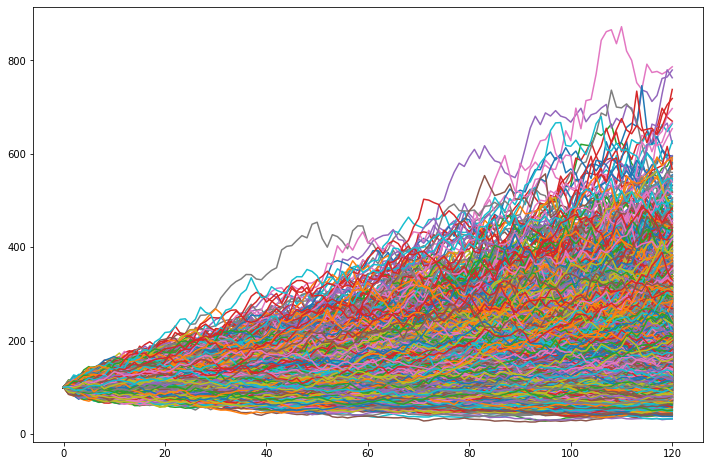

In [5]:
prices_eq.plot(figsize=(12,8),legend=False)

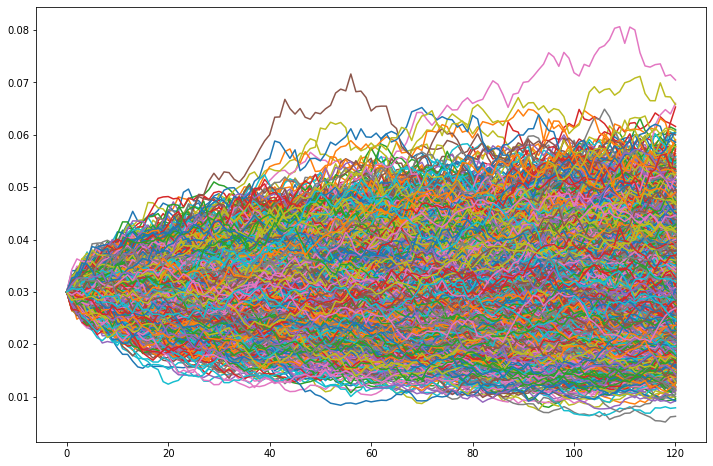

In [6]:
rates.plot(figsize=(12,8),legend=False)

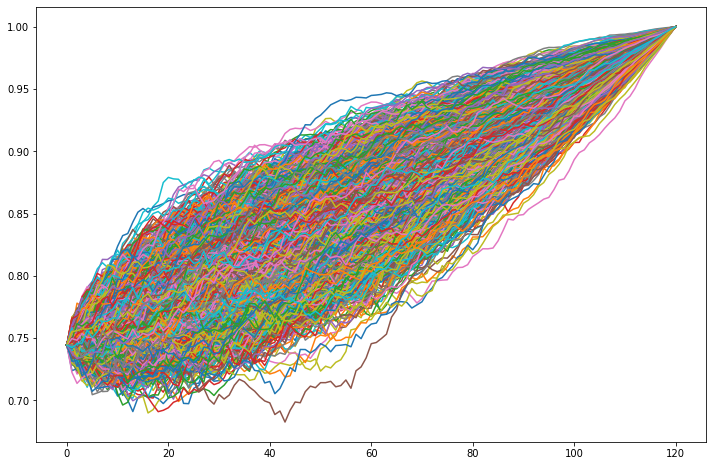

In [8]:
zc_prices.plot(figsize=(12,8),legend=False)

In [9]:
rets_eq = prices_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()
rets_7030b = eri.bt_mix(rets_eq,rets_zc,allocator=eri.fixedmix_allocator,w1=0.7)
pd.concat([eri.terminal_stats(rets_zc,name="ZC",floor=0.75),
         eri.terminal_stats(rets_eq,name="EQ",floor=0.75),
         eri.terminal_stats(rets_7030b,name="70/30",floor=.75)],
         axis=1).round(2)

,ZC,EQ,70/30
mean,1.34,1.96,1.75
std,0.00,0.94,0.58
p_breach,NaN,0.04,0.01
e_short,NaN,0.11,0.09
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


In [20]:
rets_floor75 = eri.bt_mix(rets_eq,rets_zc,allocator=eri.floor_allocator,floor=.75,zc_prices=zc_prices[1:])
pd.concat([eri.terminal_stats(rets_zc,name="ZC",floor=0.75),
         eri.terminal_stats(rets_eq,name="EQ",floor=0.75),
         eri.terminal_stats(rets_7030b,name="70/30",floor=.75),
         eri.terminal_stats(rets_floor75,name="Floor75",floor=.75)],
         axis=1).round(2)

,ZC,EQ,70/30,Floor75
mean,1.34,1.96,1.75,1.93
std,0.00,0.96,0.58,0.96
p_breach,NaN,0.03,0.01,NaN
e_short,NaN,0.12,0.07,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [21]:
rets_floor75m1 = eri.bt_mix(rets_eq,rets_zc,allocator=eri.floor_allocator,floor=.75,zc_prices=zc_prices[1:],m=1)
rets_floor75m5 = eri.bt_mix(rets_eq,rets_zc,allocator=eri.floor_allocator,floor=.75,zc_prices=zc_prices[1:],m=5)
pd.concat([eri.terminal_stats(rets_zc,name="ZC",floor=0.75),
         eri.terminal_stats(rets_eq,name="EQ",floor=0.75),
         eri.terminal_stats(rets_7030b,name="70/30",floor=.75),
         eri.terminal_stats(rets_floor75,name="Floor75",floor=.75),
         eri.terminal_stats(rets_floor75m1,name="Floor75m1",floor=.75),
         eri.terminal_stats(rets_floor75m5,name="Floor75m5",floor=.75),
          ],
         axis=1).round(2)

,ZC,EQ,70/30,Floor75,Floor75m1,Floor75m5
mean,1.34,1.96,1.75,1.93,1.62,1.94
std,0.00,0.96,0.58,0.96,0.42,0.97
p_breach,NaN,0.03,0.01,NaN,NaN,NaN
e_short,NaN,0.12,0.07,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pd.concat([eri.terminal_stats(rets_zc,name="ZC",floor=0.75),
         eri.terminal_stats(rets_eq,name="EQ",floor=0.75),
         eri.terminal_stats(rets_7030b,name="70/30",floor=.75),
         eri.terminal_stats(rets_floor75,name="Floor75",floor=.75),
         eri.terminal_stats(rets_floor75m1,name="Floor75m1",floor=.75),
         eri.terminal_stats(rets_floor75m5,name="Floor75m5",floor=.75),
          ],
         axis=1).round(4)

,ZC,EQ,70/30,Floor75,Floor75m1,Floor75m5
mean,1.3433,1.9556,1.7490,1.9323,1.6156,1.9424
std,0.0000,0.9591,0.5846,0.9647,0.4233,0.9670
p_breach,NaN,0.0344,0.0090,NaN,NaN,NaN
e_short,NaN,0.1247,0.0733,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


# Risk Budgeting with Drawdown Constraints

In [26]:
cashrate = .02
monthly_cashreturn = (1+cashrate)**(1/12)-1
rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_eq.index,columns = rets_eq.columns)
rets_maxdd25 = eri.bt_mix(rets_eq,rets_cash,allocator=eri.drawdown_allocator,maxdd=.25)
tv_maxdd25 = eri.terminal_values(rets_maxdd25)
pd.concat([eri.terminal_stats(rets_zc,name="ZC",floor=0.75),
         eri.terminal_stats(rets_eq,name="EQ",floor=0.75),
         eri.terminal_stats(rets_7030b,name="70/30",floor=.75),
         eri.terminal_stats(rets_floor75,name="Floor75",floor=.75),
         eri.terminal_stats(rets_floor75m1,name="Floor75m1",floor=.75),
         eri.terminal_stats(rets_floor75m5,name="Floor75m5",floor=.75),
         eri.terminal_stats(rets_maxdd25,name="MaxDD25",floor=.75),
          ],
         axis=1).round(4)

,ZC,EQ,70/30,Floor75,Floor75m1,Floor75m5,MaxDD25
mean,1.3433,1.9556,1.7490,1.9323,1.6156,1.9424,1.6210
std,0.0000,0.9591,0.5846,0.9647,0.4233,0.9670,0.5299
p_breach,NaN,0.0344,0.0090,NaN,NaN,NaN,NaN
e_short,NaN,0.1247,0.0733,NaN,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
eri.Summary_Stats(rets_maxdd25)["Max Drawdown"].head()

0   -0.188064
1   -0.164213
2   -0.173480
3   -0.207443
4   -0.091060
Name: Max Drawdown, dtype: float64

In [30]:
eri.Summary_Stats(rets_maxdd25)["Max Drawdown"].min() #to see the worst case in the 5000 cases
#We cans ee it is less than .25

-0.23408284081741199

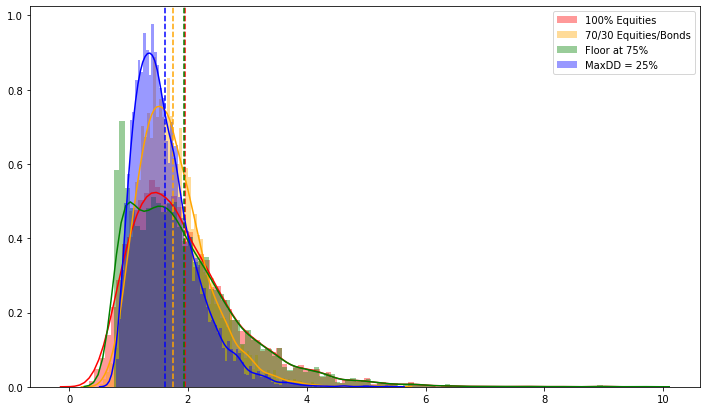

In [31]:
tv_eq       = eri.terminal_values(rets_eq)
tv_ac       = eri.terminal_values(rets_zc)
tv_7030b    = eri.terminal_values(rets_7030b)
tv_floor75  = eri.terminal_values(rets_floor75)
tv_maxdd    = eri.terminal_values(rets_maxdd25)

#Plot 
plt.figure(figsize=(12,7))
sns.distplot(tv_eq,color="red",label="100% Equities",bins=100)
plt.axvline(tv_eq.mean(),ls="--",color="red")

sns.distplot(tv_7030b,color="orange",label="70/30 Equities/Bonds",bins=100)
plt.axvline(tv_7030b.mean(),ls="--",color="orange")

sns.distplot(tv_floor75,color="green",label="Floor at 75%",bins=100)
plt.axvline(tv_floor75.mean(),ls="--",color="green")

sns.distplot(tv_maxdd,color="blue",label="MaxDD = 25%",bins=100)
plt.axvline(tv_maxdd25.mean(),ls="--",color="blue")
plt.legend();

# Drawdown Constraint with Historical Data

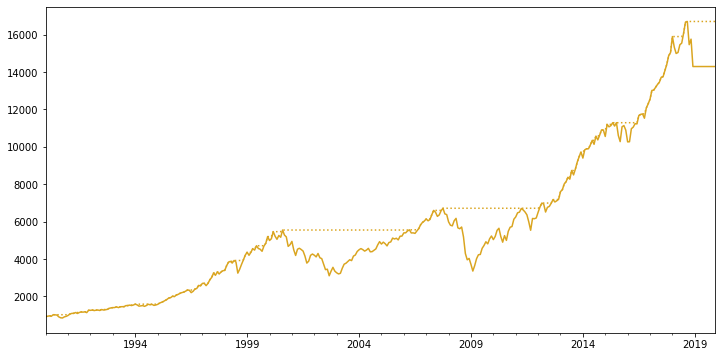

In [34]:
rets_tmi = eri.get_total_mkt_index_return()["1990":]
dd_tmi = eri.drawdown(rets_tmi)
ax = dd_tmi["wealth"].plot(figsize=(12,6),ls="-",color="goldenrod")
dd_tmi["peaks"].plot(ax=ax, ls=":",color="goldenrod")

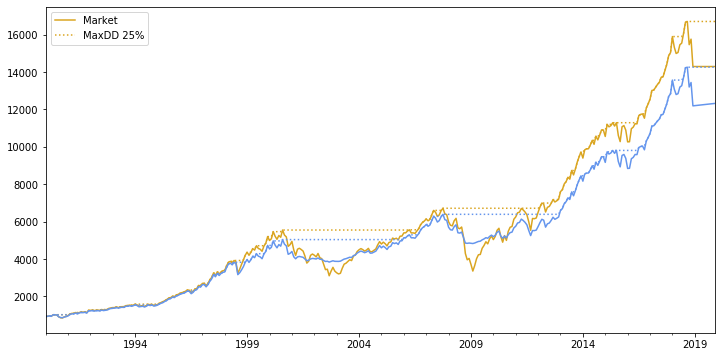

In [36]:
cashrate = .03
monthly_cashreturn = (1+cashrate)**(1/12)-1
rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_tmi.index,columns = [0]) # 1 column dataframe
rets_maxdd25 = eri.bt_mix(pd.DataFrame(rets_tmi),rets_cash,allocator=eri.drawdown_allocator,maxdd=.25,m=5)
dd_25 = eri.drawdown(rets_maxdd25[0])

ax= dd_tmi["wealth"].plot(figsize=(12,6),ls="-",color="goldenrod",label="Market",legend=True)
dd_tmi["peaks"].plot(ax=ax,ls=":", color="goldenrod")
dd_25["wealth"].plot(ax=ax,label="MaxDD 25%",color="cornflowerblue",legend=True)
dd_25["peaks"].plot(ax=ax,color="cornflowerblue",ls=":")

In [37]:
eri.Summary_Stats(pd.concat([rets_tmi.rename("Market"),rets_maxdd25[0].rename("MaxDD")],axis=1))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var(5%),HistoricCVaR(5%),Sharp Ratio,Max Drawdown
Market,0.09271,0.143065,-0.658332,4.363118,0.065807,0.094629,0.094629,-0.499938
MaxDD,0.08732,0.110934,-0.618662,5.154948,0.049088,0.071072,0.071072,-0.244212
